In [16]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
import numpy as np

(-0.5, 999.5, 999.5, -0.5)

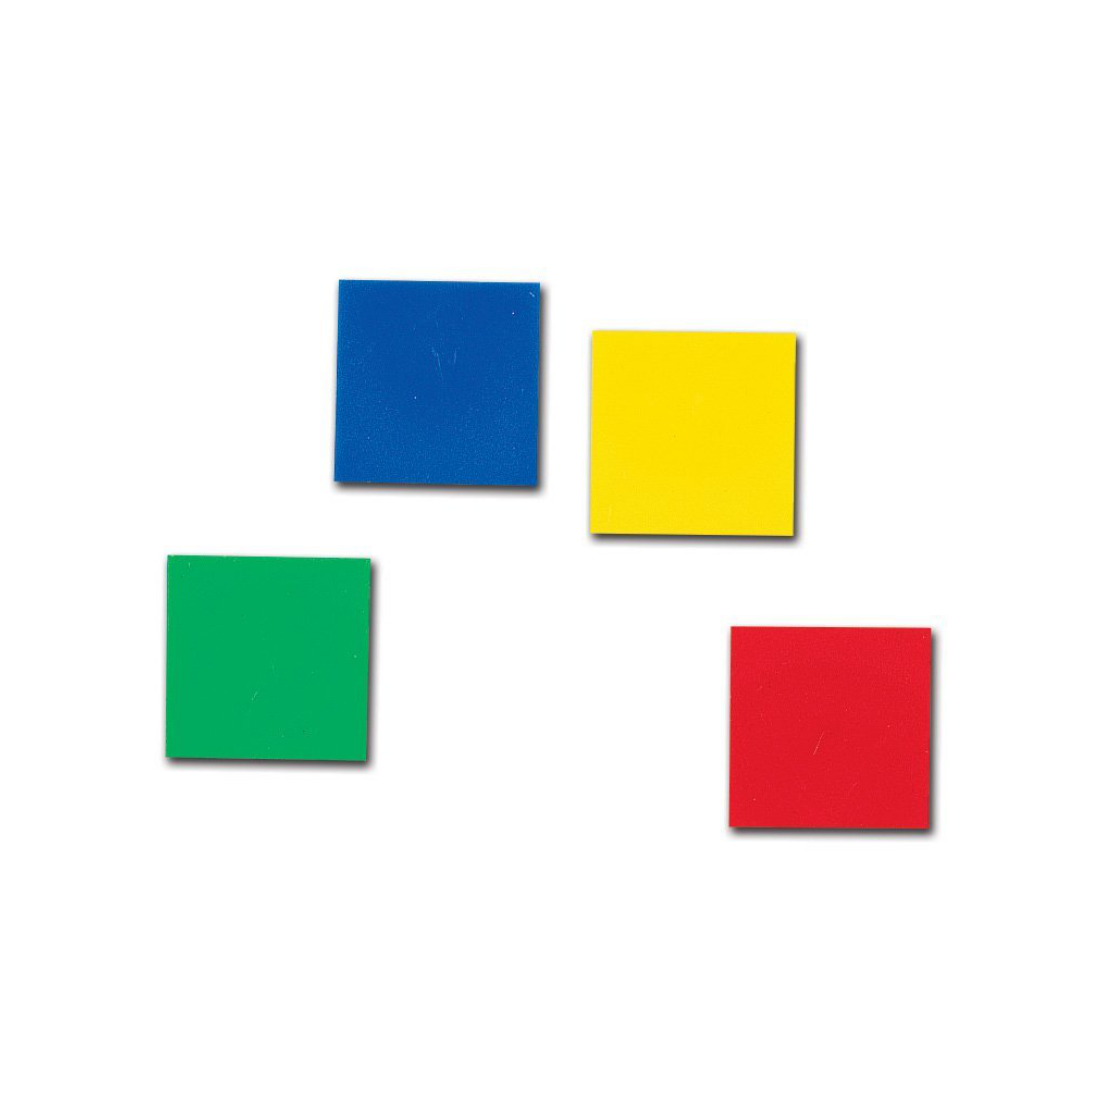

In [17]:
image = imread('https://m.media-amazon.com/images/I/51p1FntQIML._SL1000_.jpg')

# cimage = imread('https://images.unsplash.com/photo-1580015915218-685fd3cbfa97?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=1267&amp;q=80')
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
ax.axis('off')

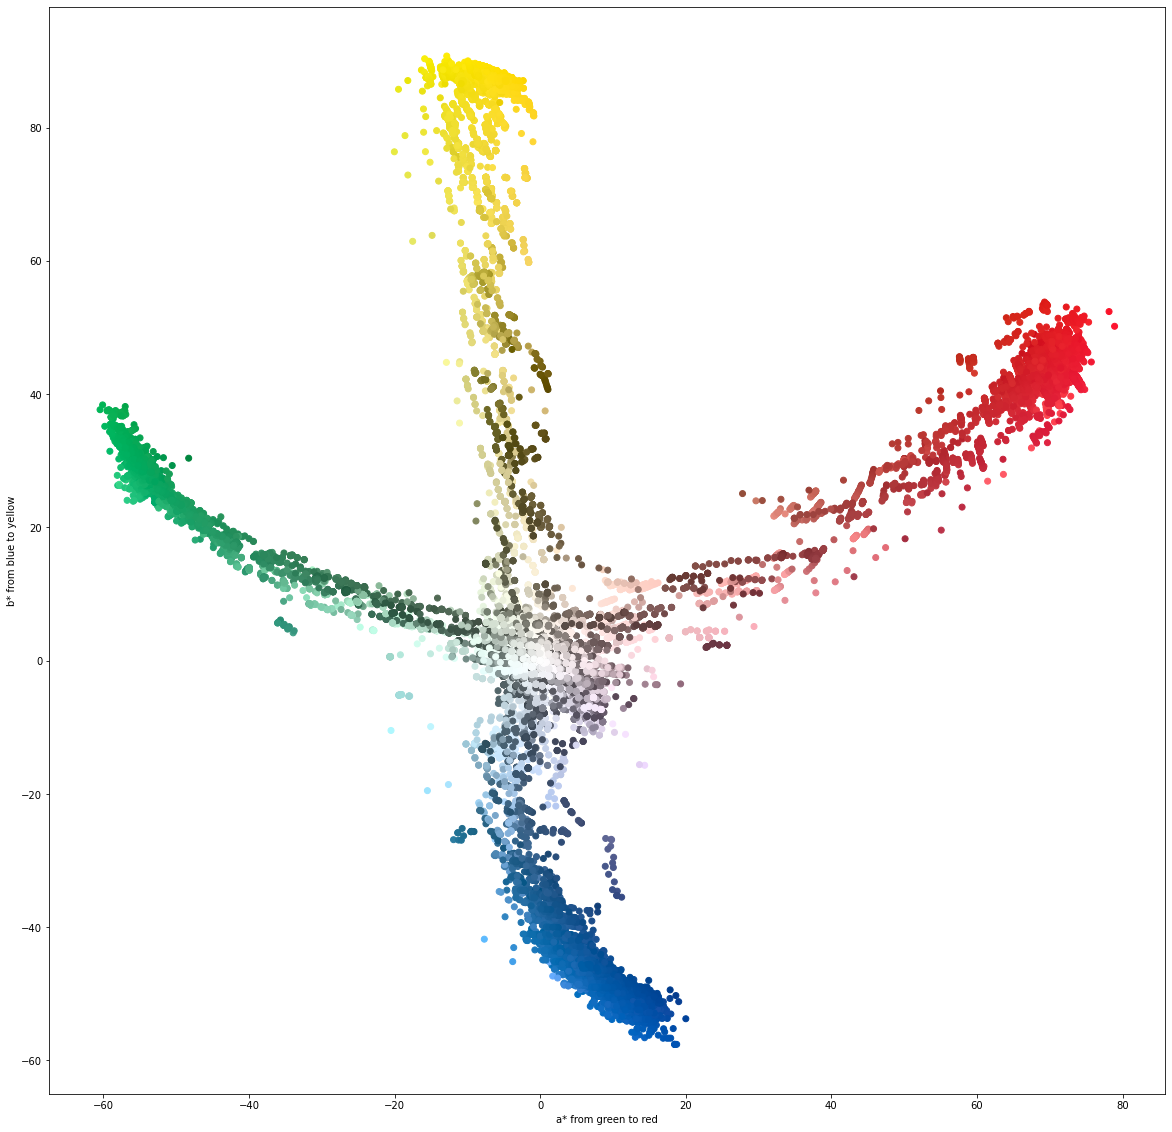

In [18]:
# convert the image from RGB to LAB
lab_img = color.rgb2lab(image)
x,y,z = lab_img.shape

# to plot the colors we will use the RGB values from the
# image directly for colors. 
to_plot = image.reshape(x*y, 3)
colors_map = to_plot.astype(float)/256

# create dataset for scatter plot
scatter_x = []
scatter_y = []
for xi in range(x):
    for yi in range(y):
        L_val = lab_img[xi,yi][0] 
        A_val = lab_img[xi,yi][1] 
        B_val = lab_img[xi,yi][2]
        scatter_x.append(A_val)
        scatter_y.append(B_val)
        
plt.figure(figsize=(20,20))
plt.xlabel("a* from green to red")
plt.ylabel("b* from blue to yellow")
plt.scatter(scatter_x,scatter_y, c=colors_map)

In [5]:
# print(
# L_val.min(),
# A_val.min(),
# A_val.max(),
# B_val.min(),
# B_val.max())

72.32667543210437 7.102465945759806 7.102465945759806 35.80607417690012 35.80607417690012


(-0.5, 999.5, 999.5, -0.5)

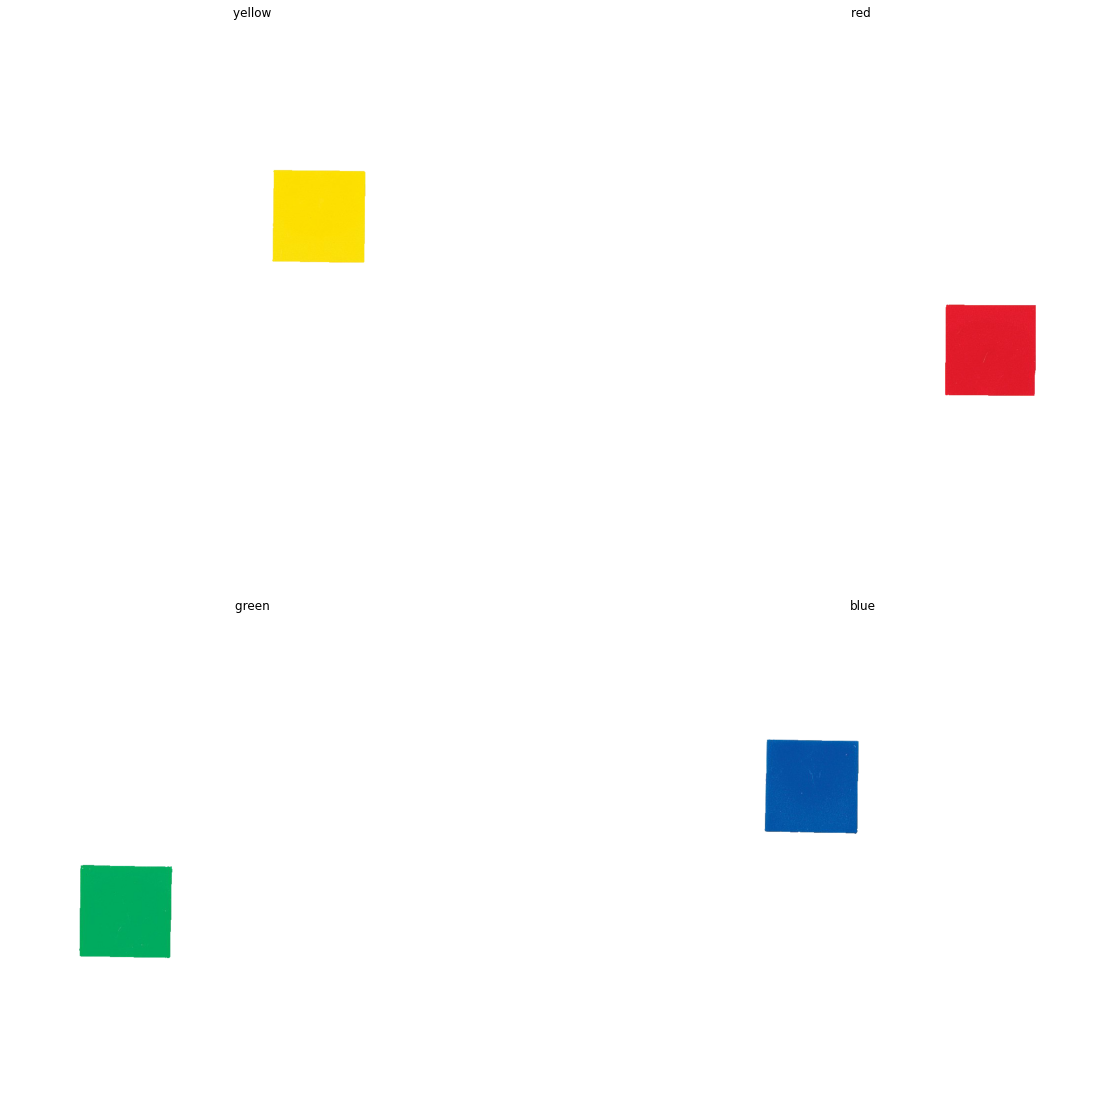

In [24]:
def filter_color(L_val_min, A_val_min, A_val_max, B_val_min, B_val_max):
    filtered_image = np.copy(image)
    for xi in range(x):
        for yi in range(y):
            L_val = lab_img[xi,yi][0] 
            A_val = lab_img[xi,yi][1] 
            B_val = lab_img[xi,yi][2]
            if L_val > L_val_min and A_val > A_val_min and A_val < A_val_max  and B_val > B_val_min and B_val < B_val_max:
                pass
            else:
                filtered_image[xi, yi] = [255,255,255]   
    return filtered_image


lab_img = color.rgb2lab(cimage)
yellow = filter_color(70, -20, 20, 70, 100)
red = filter_color(30, 60, 80, 0, 70)
green = filter_color(50, -60, -40, 20, 40)
blue = filter_color(20, -40, 40, -70, -20)
white = filter_color(93, 0, 0, 0, 0)
# pink = filter_color(50, 75, 100,-70, -50)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

ax[0][0].imshow(yellow)
ax[0][0].set_title("yellow ")
ax[0][0].axis('off')

ax[0][1].imshow(red)
ax[0][1].set_title("red ")
ax[0][1].axis('off')

ax[1][0].imshow(green)
ax[1][0].set_title("green ")
ax[1][0].axis('off')

ax[1][1].imshow(blue)
ax[1][1].set_title("blue")
ax[1][1].axis('off')